In [1]:
%load_ext autoreload

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.getcwd())  # Asegura que Python pueda encontrar tus módulos

from Blackbox import predict_point, predict_batch
import tensorflow as tf
from tensorflow import keras

# ✅ Ruta corregida al modelo
model = keras.models.load_model('Blackbox/blackbox_S.keras')

# Prueba de predicción
predict_point(model, 0.2, 0.4)



[06-15 13:56:13][INFO] Interactive session
[06-15 13:56:13][INFO] 2025-06-15 13:56:13.576197
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


1.0

In [3]:
predict_point(model, 0.2, 0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


1.0

In [4]:
predict_point(model, 1.1, 1.3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


0.0

In [5]:
%autoreload 2
from Blackbox import predict_point, predict_batch
predict_batch(model, [0.2, 1.1], [0.4, 1.3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


[1.0, 0.0]

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


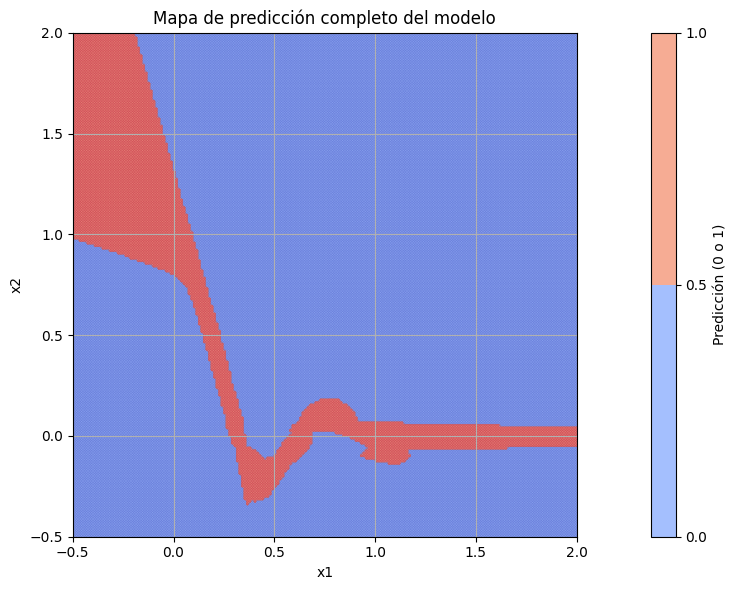

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una cuadrícula de valores (x1, x2) con mayor resolución
x1_vals = np.linspace(-0.5, 2, 200)  # antes 1.5, ahora 2 y más puntos
x2_vals = np.linspace(-0.5, 2, 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Aplanar los valores para el batch
x1_flat = X1.ravel()
x2_flat = X2.ravel()

# Usar la versión batch para hacer predicciones más rápido
Z = predict_batch(model, x1_flat.tolist(), x2_flat.tolist())
Z = np.array(Z).reshape(X1.shape)

# Graficar con mejor visualización
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, Z, levels=np.linspace(0, 1, 3), cmap="coolwarm", alpha=0.8)

# Agregar todos los puntos evaluados como dispersión
plt.scatter(x1_flat, x2_flat, c=Z.ravel(), cmap="coolwarm", s=5, alpha=0.4, edgecolors='none')

# Mejorar la presentación
plt.colorbar(contour, label="Predicción (0 o 1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Mapa de predicción completo del modelo")
plt.axis("scaled")  # Relación 1:1 entre x y y
plt.grid(True)
plt.tight_layout()
plt.show()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


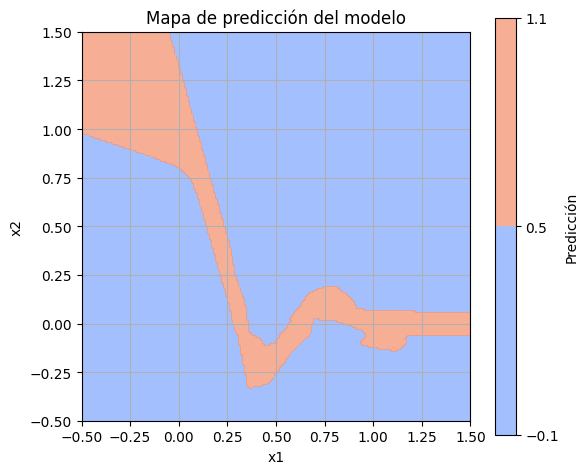

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una cuadrícula de valores (x1, x2)
x1_vals = np.linspace(-0.5, 1.5, 200)
x2_vals = np.linspace(-0.5, 1.5, 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Aplanar los valores para predict_batch
x1_flat = X1.ravel().tolist()
x2_flat = X2.ravel().tolist()

# Predecir
Z = predict_batch(model, x1_flat, x2_flat)
Z = np.array(Z).reshape(X1.shape)

# Graficar con niveles ajustados
plt.figure(figsize=(6, 5))
contour = plt.contourf(X1, X2, Z, levels=[-0.1, 0.5, 1.1], cmap="coolwarm", alpha=0.8)



plt.colorbar(contour, label="Predicción")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Mapa de predicción del modelo")
plt.axis("scaled")
plt.grid(True)
plt.tight_layout()
plt.show()


## Cómo lo analizas en tu máquina

In [40]:
from tensorflow import keras

# Cargar el modelo (usar la ruta correcta)
modelo = keras.models.load_model("Blackbox/blackbox_S.keras")

# Mostrar resumen del modelo
modelo.summary()

# Ver tipo y forma de entrada esperada
print("Entrada esperada:", modelo.input_shape)
print("Salida esperada:", modelo.output_shape)

# Ver los nombres de capas (opcional)
for i, layer in enumerate(modelo.layers):
    # Usar layer.output.shape para obtener la forma de salida de manera segura
    output_shape = getattr(layer, "output_shape", None)
    if output_shape is None and hasattr(layer, "output"):
        output_shape = getattr(layer.output, "shape", "Desconocido")
    print(f"Capa {i}: {layer.name} - {layer.__class__.__name__} - salida: {output_shape}")


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 23)             │            69 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 21)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 19)             │           418 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 12)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,834 (22.79 KB)

 Trainable params: 1,944 (7.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,890 (15.20 KB)

Entrada esperada: (None, 2)
Salida esperada: (None, 1)
Capa 0: dense_100 - Dense - salida: (None, 23)
Capa 1: dense_101 - Dense - salida: (None, 23)
Capa 2: dense_102 - Dense - salida: (None, 21)
Capa 3: dense_103 - Dense - salida: (None, 19)
Capa 4: dense_104 - Dense - salida: (None, 12)
Capa 5: dense_105 - Dense - salida: (None, 6)
Capa 6: dense_106 - Dense - salida: (None, 6)
Capa 7: dense_107 - Dense - salida: (None, 5)
Capa 8: dense_108 - Dense - salida: (None, 1)


### EXTRAYENDO ARQUITECTURA ARCHIVO .KERAS


In [37]:
from tensorflow import keras

# Cargar el modelo
model = keras.models.load_model('Blackbox/blackbox_S.keras')

# Mostrar resumen detallado del modelo
model.summary()

# Mostrar detalles de cada capa
for i, layer in enumerate(model.layers):
    print(f"Capa {i}: {layer.name}")
    print(f"Tipo: {layer.__class__.__name__}")
    # Forma de entrada
    input_shape = getattr(layer, "input_shape", None)
    if input_shape is None and hasattr(layer, "input"):
        input_shape = getattr(layer.input, "shape", "Desconocido")
    print(f"Forma de entrada: {input_shape}")
    # Forma de salida
    output_shape = getattr(layer, "output_shape", None)
    if output_shape is None and hasattr(layer, "output"):
        output_shape = getattr(layer.output, "shape", "Desconocido")
    print(f"Forma de salida: {output_shape}")
    print()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 23)             │            69 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 21)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 19)             │           418 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 12)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,834 (22.79 KB)

 Trainable params: 1,944 (7.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,890 (15.20 KB)

Capa 0: dense_100
Tipo: Dense
Forma de entrada: (None, 2)
Forma de salida: (None, 23)

Capa 1: dense_101
Tipo: Dense
Forma de entrada: (None, 23)
Forma de salida: (None, 23)

Capa 2: dense_102
Tipo: Dense
Forma de entrada: (None, 23)
Forma de salida: (None, 21)

Capa 3: dense_103
Tipo: Dense
Forma de entrada: (None, 21)
Forma de salida: (None, 19)

Capa 4: dense_104
Tipo: Dense
Forma de entrada: (None, 19)
Forma de salida: (None, 12)

Capa 5: dense_105
Tipo: Dense
Forma de entrada: (None, 12)
Forma de salida: (None, 6)

Capa 6: dense_106
Tipo: Dense
Forma de entrada: (None, 6)
Forma de salida: (None, 6)

Capa 7: dense_107
Tipo: Dense
Forma de entrada: (None, 6)
Forma de salida: (None, 5)

Capa 8: dense_108
Tipo: Dense
Forma de entrada: (None, 5)
Forma de salida: (None, 1)

